<a href="https://colab.research.google.com/github/githubx147/11/blob/main/7008_a3_LiuRuixi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **STAT7008 A3
LiuRuixi
刘睿熙 No. 3036371223
lrx1217@conncet.hku.hk**

**Q1. (K-Means Clustering) We experiment with the well-known Fashion MINST dataset:**


 **a) When given a machine-learning task, the first step is always to do the Exploratory Data
Analysis(EDA), which helps you understand the dataset and the problem quickly. In this part,
you should: Load the Fashion MINST and display the data volume, the basic data samples, the
sample distribution of different class**

Training data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)
Training labels distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


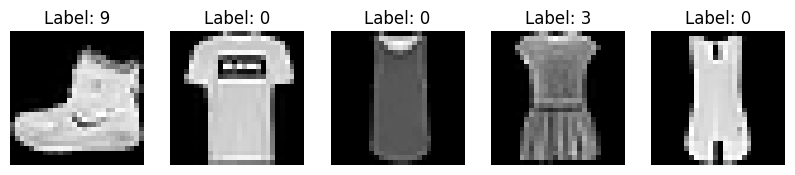

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

print(f'Training data shape: {x_train.shape}, Test data shape: {x_test.shape}')
print(f'Training labels distribution: {np.unique(y_train, return_counts=True)}')

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

 **b) Suppose you do not know the labels of each sample, conduct the K-Means Clustering on
the training split and visualize the clustering results with T-SNE. (Hint: Considering the data
volume, during the K-Means, you may need to use the MiniBatchKMeans from the Scikit-learn
package to facilitate efficient implementation)**

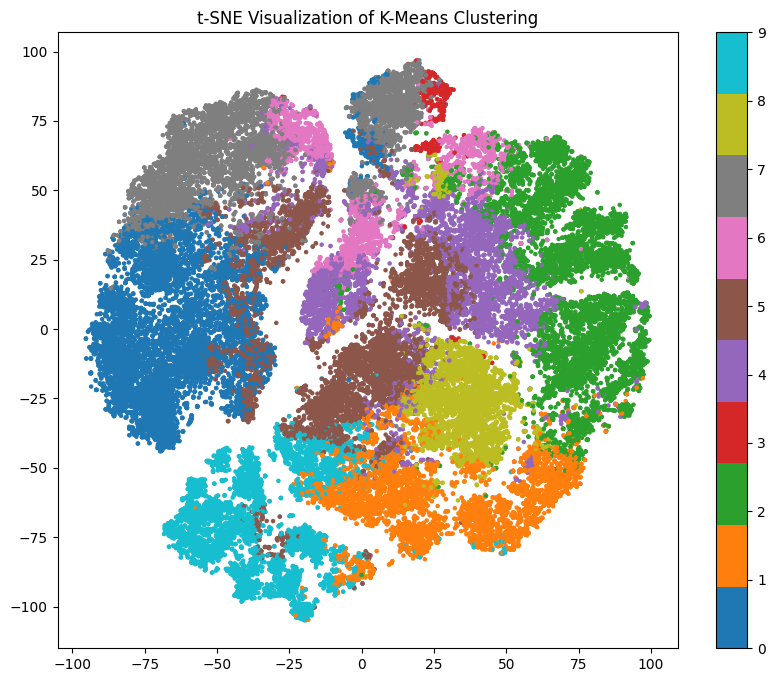

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

n_clusters = 10
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=100)
kmeans.fit(x_train_scaled)
y_pred = kmeans.predict(x_train_scaled)

tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train_scaled)

plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y_pred, cmap='tab10', s=5)
plt.title('t-SNE Visualization of K-Means Clustering')
plt.colorbar()
plt.show()


**c) Determine the best number of clustering(i.e. K) with the Elbow Method and Crossvalidation Method and compare the best K value with the true number of categories.**

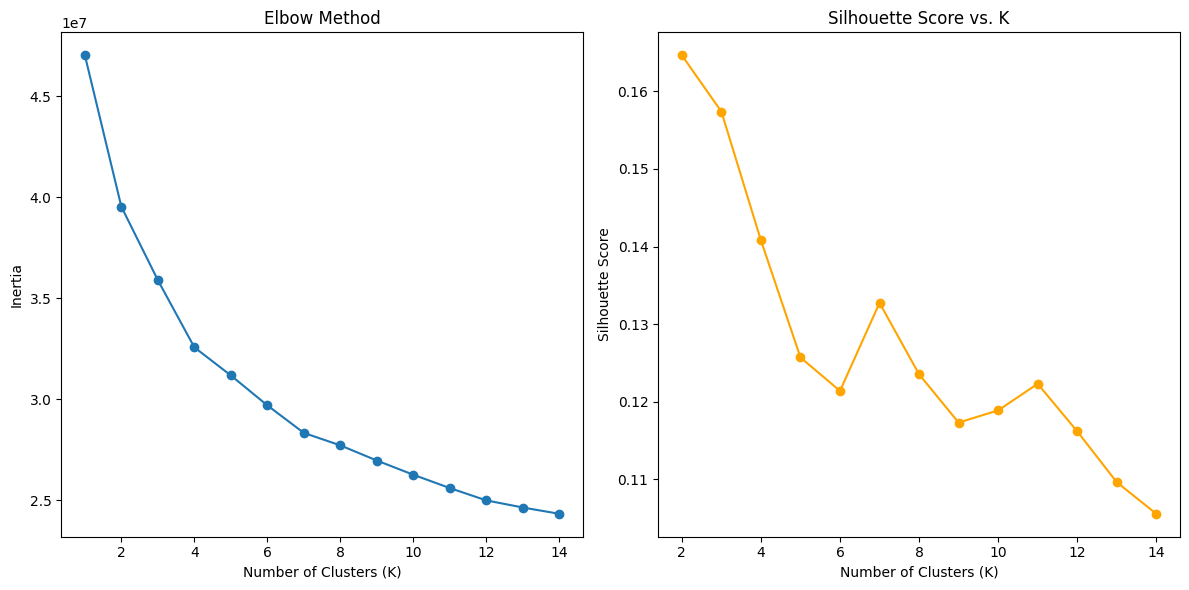

Best K based on silhouette score: 2


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(1, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train_scaled)
    inertia.append(kmeans.inertia_)
    if k > 1:
        sil_score = silhouette_score(x_train_scaled, kmeans.labels_)
        silhouette_scores.append(sil_score)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(K_range[1:], silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score vs. K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

best_k = K_range[silhouette_scores.index(max(silhouette_scores)) + 1]
print("Best K based on silhouette score:", best_k)

 **d) Calculate the cluster centroid for each clustering and visualize these centroids, and explain
the reasonability of your clustering results according to the centroid.**

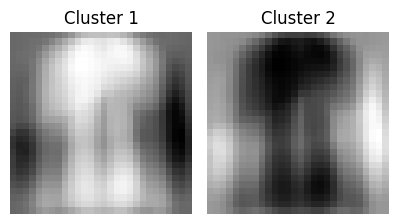

In [ ]:
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(x_train_scaled)

centroids = kmeans_best.cluster_centers_

centroids_images = centroids.reshape(best_k, 28, 28)

plt.figure(figsize=(10, 5))
for i in range(best_k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids_images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Cluster {i+1}")
plt.tight_layout()
plt.show()

 **Q2. (PCA) In Q1, we utilize the advanced dimension reduction method – T-SNE to facilitate our
visualization on the clustering results. Another commonly used dimension reduction method is
PCA. In this part, you need to:**

 **a) Load the Fashion MNIST dataset and use MinMaxScaler to calculate the normalize
covariates X.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X = X_train.reshape(X_train.shape[0], -1)

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

print(f"Shape of normalized data: {X_normalized.shape}")

Shape of normalized data: (60000, 784)


**b) Based on the covariates X, fit Principal Component Analysis (PCA, n_components=2)
model to the training set for dimension reduction.**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

print(f"Shape of PCA-transformed data: {X_pca.shape}")

Shape of PCA-transformed data: (60000, 2)


**c) Based on the fitted PCA model, visualize the clustering results in Q.1 again and compare
these two ways different.**

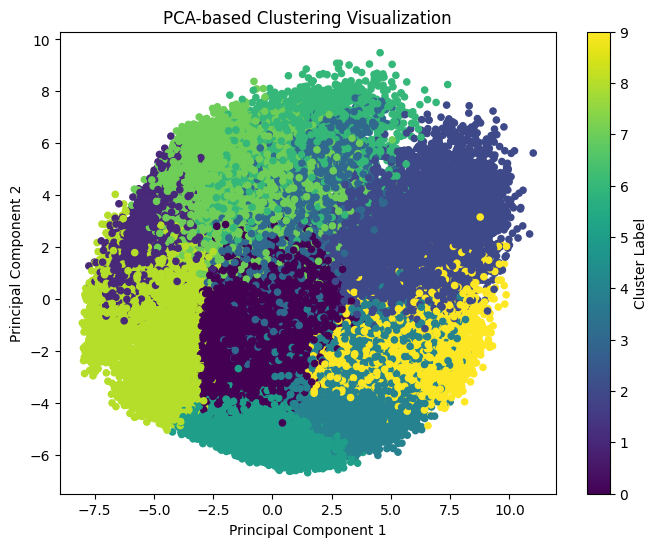

In [ ]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=20)
plt.colorbar(label='Cluster Label')
plt.title("PCA-based Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_kmeans, cmap='viridis', s=20)
plt.colorbar(label='Cluster Label')
plt.title("T-SNE-based Clustering Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Using PCA for dimensionality reduction before performing K-Means clustering helps to reduce computational complexity, remove redundant information, and improve clustering performance.

**Q3. (KNN & Naïve Bayesian) We focus on the classification problem on the Fashion MNIST
dataset, and in this part, you are required to:**

**a) Split the training set of Fashion MNIST into train and validation split**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.datasets as keras_datasets

(X_train, y_train), (X_test, y_test) = keras_datasets.fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train_split.shape}, Validation set shape: {X_val_split.shape}")


Training set shape: (48000, 784), Validation set shape: (12000, 784)


**b) Fit the naive bayes model MultinomialNB on the training split with different values
of the parameter alpha α and evaluate the accuracy on the validation split for each α
and draw the line plot of the accuracy score versus different α. Finally, choose the
best α on validation split and report the accuracy on the test split.**

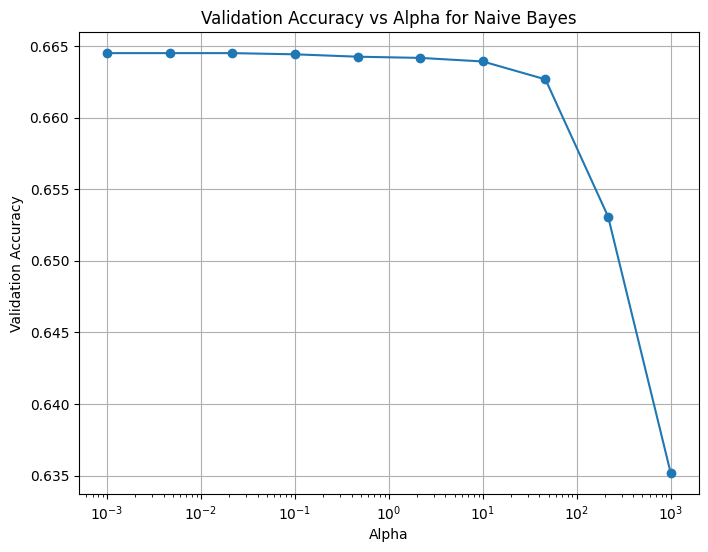

Best alpha: 0.001
Test Accuracy for Naive Bayes: 0.6553


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

alphas = np.logspace(-3, 3, 10)
accuracy_scores = []

for alpha in alphas:
    nb = MultinomialNB(alpha=alpha)
    nb.fit(X_train_split, y_train_split)
    y_val_pred = nb.predict(X_val_split)
    accuracy = accuracy_score(y_val_split, y_val_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(alphas, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Alpha for Naive Bayes')
plt.grid(True)
plt.show()

best_alpha = alphas[np.argmax(accuracy_scores)]
print(f"Best alpha: {best_alpha}")

nb_best = MultinomialNB(alpha=best_alpha)
nb_best.fit(X_train_normalized, y_train)

y_test_pred_nb = nb_best.predict(X_test_normalized)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
print(f"Test Accuracy for Naive Bayes: {test_accuracy_nb:.4f}")

**c) Apply the PCA model from Q.2 to train and test set for dimensionality reduction,
compute the 2-dimensional embedded train/test set. Then, fit a nearest neighbor
classifier (KNN) with the best K (i.e. n_neighbors) evaluated from the validation split,
and report the final accuracy on the test split.**

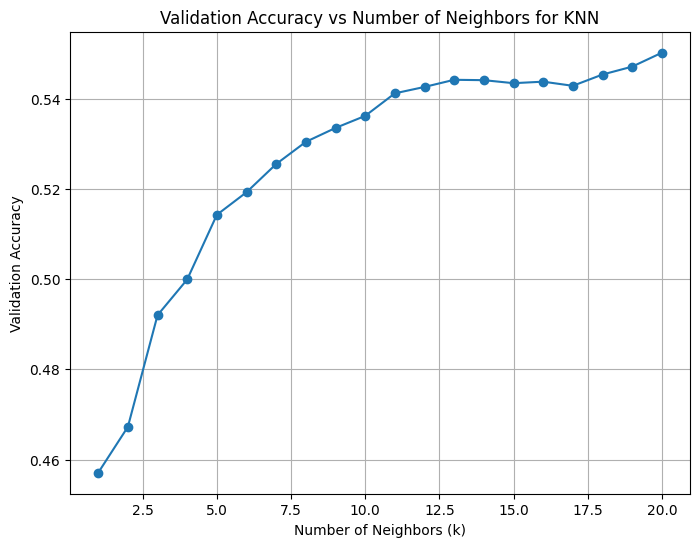

Best number of neighbors (k): 20
Test Accuracy for KNN: 0.5482


In [ ]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

X_train_pca_split, X_val_pca_split, y_train_split, y_val_split = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42)

neighbors_range = range(1, 21)
knn_accuracy_scores = []

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_pca_split, y_train_split)
    y_val_pred_knn = knn.predict(X_val_pca_split)
    accuracy_knn = accuracy_score(y_val_split, y_val_pred_knn)
    knn_accuracy_scores.append(accuracy_knn)

plt.figure(figsize=(8, 6))
plt.plot(neighbors_range, knn_accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Number of Neighbors for KNN')
plt.grid(True)
plt.show()

best_k = neighbors_range[np.argmax(knn_accuracy_scores)]
print(f"Best number of neighbors (k): {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train)

y_test_pred_knn = knn_best.predict(X_test_pca)
test_accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
print(f"Test Accuracy for KNN: {test_accuracy_knn:.4f}")


**d) Plot the dimension reduction projected data samples in the test set, and show the
ground truth labels and the labels predicted by the KNN, and Naïve Bayesian. (Note:
it means you need to plot 3 figures, one for ground truth label, one for KNN and one
for NB)**

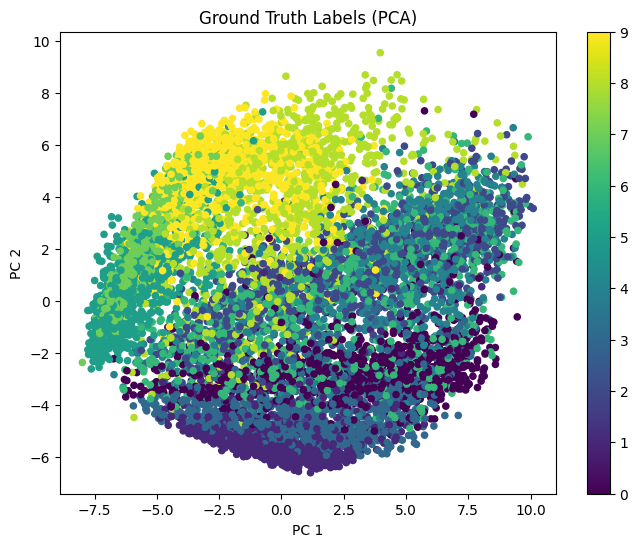

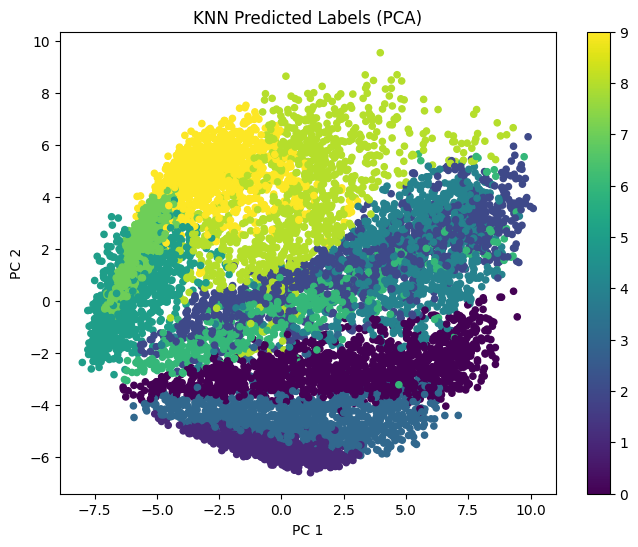

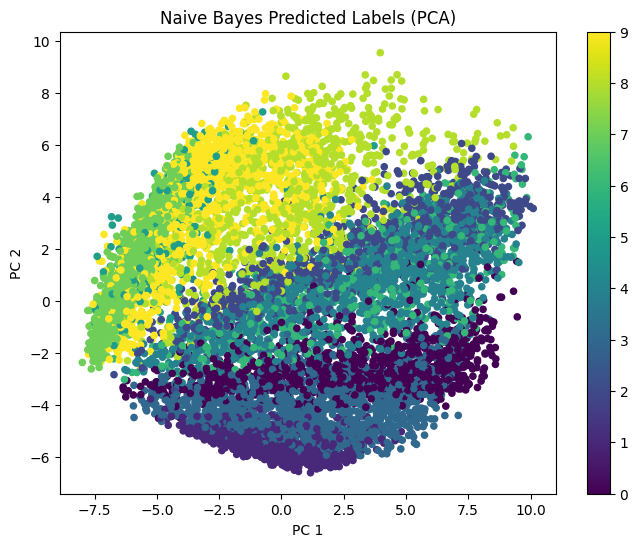

In [ ]:
def plot_embedding(X, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=20)
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

plot_embedding(X_test_pca, y_test, "Ground Truth Labels (PCA)")
plot_embedding(X_test_pca, y_test_pred_knn, "KNN Predicted Labels (PCA)")
plot_embedding(X_test_pca, y_test_pred_nb, "Naive Bayes Predicted Labels (PCA)")

**e) Summarized the confusion matrix of KNN and NB, the confusion matrix should
follow the similar style as follows:**

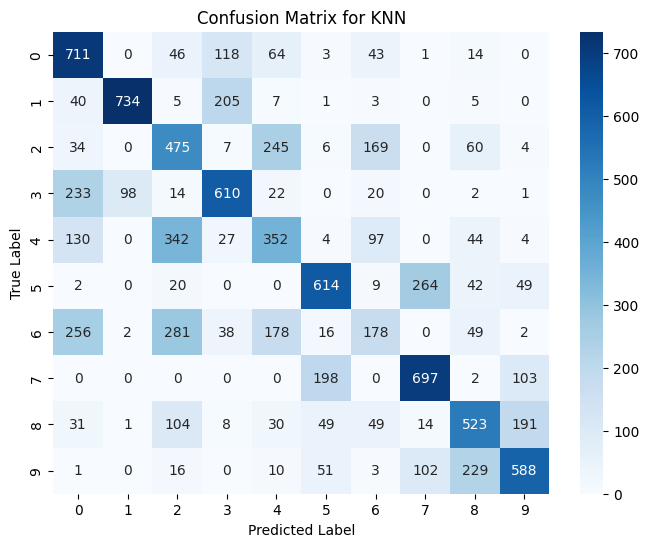

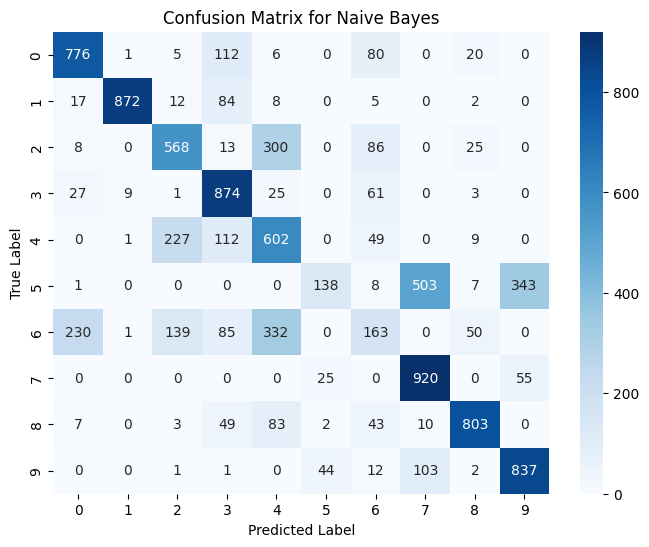

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

cm_nb = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Q4. (CNN with Pytorch) Follow the Fashion MNIST dataset, instead of using the traditional ML
method to achieve the classification of each image, here we exploit the convolution neural
network to achieve more robust and accurate classification. In this part, you are required to:**

**a) Prepare the data set. Implement the basic Pytorch dataset to enable load data from files
and support the network iterative training. Note that, your dataset should also be split into
train, validation, and test.**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainset, valset = train_test_split(full_trainset, test_size=0.2, random_state=42)
train_loader = data.DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = data.DataLoader(valset, batch_size=64, shuffle=False)
test_loader = data.DataLoader(testset, batch_size=64, shuffle=False)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(f"Image shape: {images.shape}, Label shape: {labels.shape}")

Image shape: torch.Size([64, 1, 28, 28]), Label shape: torch.Size([64])


**b) Construct a basic 3-layer CNN, including both the convolution layer and densely
connected layer and display your network structure.**

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.pool3(self.relu3(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model = CNN()
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1152, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


**c) Implement the training of your neural network, including the basic iterative training loop
and the Cross-Entropy loss function. Then, train your network and record & display the
training, and validation accuracy.**

Epoch [1/10], Train Accuracy: 0.8223, Validation Accuracy: 0.8658
Epoch [2/10], Train Accuracy: 0.8897, Validation Accuracy: 0.8957
Epoch [3/10], Train Accuracy: 0.9057, Validation Accuracy: 0.9017
Epoch [4/10], Train Accuracy: 0.9161, Validation Accuracy: 0.9104
Epoch [5/10], Train Accuracy: 0.9267, Validation Accuracy: 0.8996
Epoch [6/10], Train Accuracy: 0.9336, Validation Accuracy: 0.9098
Epoch [7/10], Train Accuracy: 0.9397, Validation Accuracy: 0.9133
Epoch [8/10], Train Accuracy: 0.9467, Validation Accuracy: 0.9123
Epoch [9/10], Train Accuracy: 0.9535, Validation Accuracy: 0.9070
Epoch [10/10], Train Accuracy: 0.9576, Validation Accuracy: 0.9068


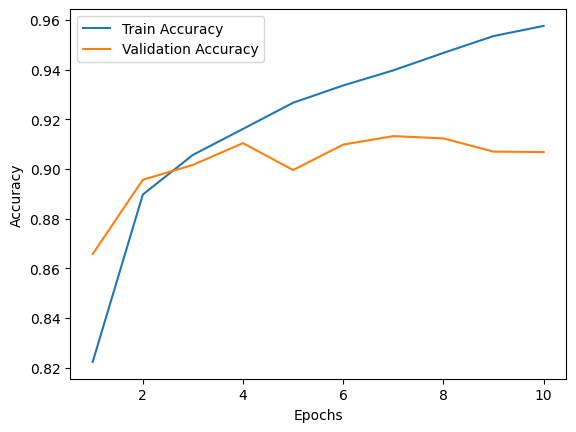

In [ ]:
from sklearn.metrics import accuracy_score

def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        correct_train = 0
        total_train = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_accuracy = correct_train / total_train
        train_accuracies.append(train_accuracy)

        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_accuracy = correct_val / total_val
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    return train_accuracies, val_accuracies

train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, num_epochs=10)

plt.plot(range(1, 11), train_accuracies, label="Train Accuracy")
plt.plot(range(1, 11), val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**d) Choose the best performance model on the validation split and do the prediction on the
test split, report the evaluation metrics including, accuracy, precision, recall, and F1 score,
and show the confusion matrix as well.**

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.88      0.88      1000
           3       0.93      0.88      0.90      1000
           4       0.91      0.81      0.85      1000
           5       0.99      0.95      0.97      1000
           6       0.71      0.73      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.97      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



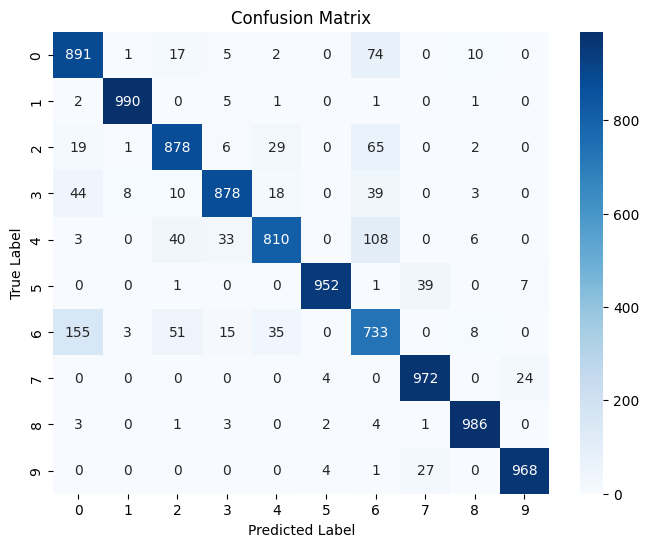

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

print("Classification Report:")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**e) Try to improve the performance of your current baseline model, you can take
measurements such as parameters tunning(e.g. learning rate), expand the model size, or data
augmentation, etc. Briefly describe what you have improved and the reason behind your
design choice.**

Epoch [1/15], Train Accuracy: 0.7924, Validation Accuracy: 0.8632
Epoch [2/15], Train Accuracy: 0.8632, Validation Accuracy: 0.8851
Epoch [3/15], Train Accuracy: 0.8820, Validation Accuracy: 0.8985
Epoch [4/15], Train Accuracy: 0.8899, Validation Accuracy: 0.8902
Epoch [5/15], Train Accuracy: 0.8975, Validation Accuracy: 0.9128
Epoch [6/15], Train Accuracy: 0.9024, Validation Accuracy: 0.9153
Epoch [7/15], Train Accuracy: 0.9063, Validation Accuracy: 0.9215
Epoch [8/15], Train Accuracy: 0.9095, Validation Accuracy: 0.9227
Epoch [9/15], Train Accuracy: 0.9130, Validation Accuracy: 0.9281
Epoch [10/15], Train Accuracy: 0.9163, Validation Accuracy: 0.9264
Epoch [11/15], Train Accuracy: 0.9199, Validation Accuracy: 0.9347
Epoch [12/15], Train Accuracy: 0.9209, Validation Accuracy: 0.9367
Epoch [13/15], Train Accuracy: 0.9221, Validation Accuracy: 0.9353
Epoch [14/15], Train Accuracy: 0.9251, Validation Accuracy: 0.9356
Epoch [15/15], Train Accuracy: 0.9266, Validation Accuracy: 0.9328


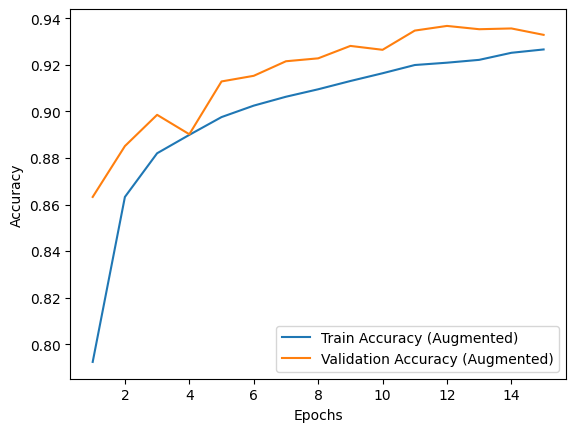

In [ ]:
augmented_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset_augmented = datasets.FashionMNIST(root='./data', train=True, download=True, transform=augmented_transform)
train_loader_augmented = data.DataLoader(trainset_augmented, batch_size=64, shuffle=True)

model = CNN()  # Re-initialize the model
train_accuracies, val_accuracies = train_model(model, train_loader_augmented, val_loader, num_epochs=15, learning_rate=0.0005)

plt.plot(range(1, 16), train_accuracies, label="Train Accuracy (Augmented)")
plt.plot(range(1, 16), val_accuracies, label="Validation Accuracy (Augmented)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Q5. (Web scraping) Scrapes and analyzes the most popular books from Project Gutenberg's Top
100 list. Your script should:**

**a) Fetch data from Project Gutenberg's "Top 100" page
(https://www.gutenberg.org/browse/scores/top)**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

**b) Extract the following information for the top 20 books: (1) Book title (2) Author name
(3) Number of downloads (4) Book ID from the url**

In [ ]:
books_data = []
count = 0

for book_link in soup.select('ol li a'):
    if count >= 20:
        break

    book_title_author = book_link.get_text()
    book_url = 'https://www.gutenberg.org' + book_link['href']
    book_id = book_link['href'].split('/')[-1]

    download_count = 'N/A'
    match = re.search(r'\((\d+)\)', book_title_author)
    if match:
        download_count = match.group(1)
        book_title_author = book_title_author.replace(f"({download_count})", '').strip()
    if 'by' in book_title_author:
        book_title, author_name = book_title_author.split('by', 1)
        book_title = book_title.strip()
        author_name = author_name.strip()
    else:
        book_title = book_title_author
        author_name = 'Unknown'

    books_data.append([book_title, author_name, download_count, book_id])
    count += 1


**c) Store the data in a pandas DataFrame, and save the results to a CSV file**

In [ ]:
df = pd.DataFrame(books_data, columns=['Title', 'Author', 'Downloads', 'Book ID'])
df.to_csv('top_20_books_gutenberg.csv', index=False)

**d) Display the formatted results in the console**

In [ ]:
print(df.to_string(index=False))

                                                               Title                                 Author Downloads Book ID
                             Frankenstein; Or, The Modern Prometheus            Mary Wollstonecraft Shelley      5855      84
                                                                 呻吟語                                 Kun Lü      3581   25558
        A Christmas Carol in Prose; Being a Ghost Story of Christmas                        Charles Dickens      3272      46
                                                                  Mo Dick; Or, The Whale by Herman Melville      2645    2701
                                                    Romeo and Juliet                    William Shakespeare      2354    1513
                                                  The Scarlet Letter                    Nathaniel Hawthorne      1997   25344
                                             A Doll's House : a play                           Henrik Ibsen      1874 

**Q6. (Web scraping) Scrape book information from Books to Scrape (http://books.toscrape.com),
a website specifically designed for scraping practice.**

**a) Scrape the following information from the first 3 pages of Books to Scrape: (1) Book
title (2) Price (3) Star rating (4) Availability**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

base_url = 'http://books.toscrape.com/catalogue/page-{}.html'

def scrape_books(page_number):
    url = base_url.format(page_number)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    books = []
    for book in soup.select('.product_pod'):
        title = book.h3.a['title']
        price = book.select_one('.price_color').text[1:]
        rating = book.select_one('p').get('class')[1]
        availability = book.select_one('.instock.availability').text.strip()
        books.append([title, float(price), rating, availability])

    return books

all_books = []
for page in range(1, 4):
    all_books.extend(scrape_books(page))
df = pd.DataFrame(all_books, columns=['Title', 'Price', 'Rating', 'Availability'])

**b) Visualize the distribution of book prices**

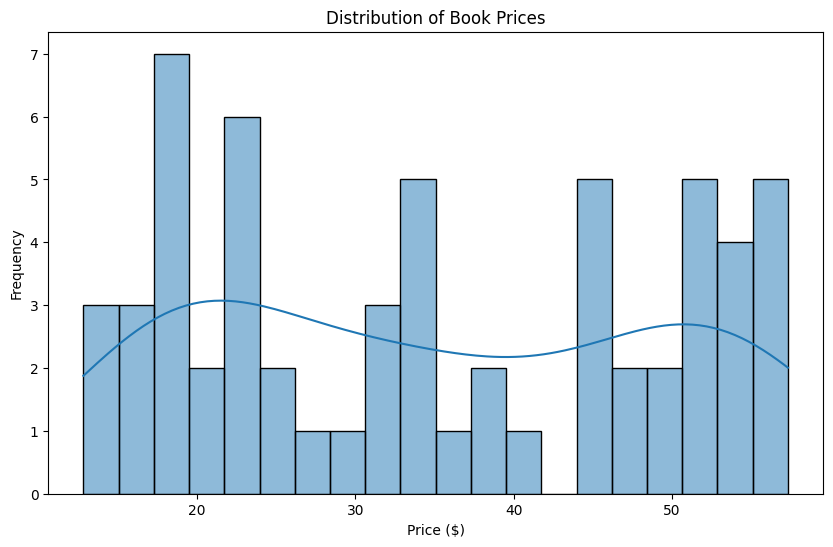

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Book Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

**c) What is the average rating for books?**

In [ ]:
rating_map = {
    'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5
}
df['Rating_numeric'] = df['Rating'].map(rating_map)

average_rating = df['Rating_numeric'].mean()
print(f"The average rating for books is: {average_rating:.2f}")

The average rating for books is: 3.00


**d) How many books are in each rating category?**

In [ ]:
rating_counts = df['Rating_numeric'].value_counts().sort_index()
print("\nNumber of books in each rating category:")
print(rating_counts)


Number of books in each rating category:
Rating_numeric
1    15
2     8
3    13
4    10
5    14
Name: count, dtype: int64


**e) What is the relationship between price and rating?**

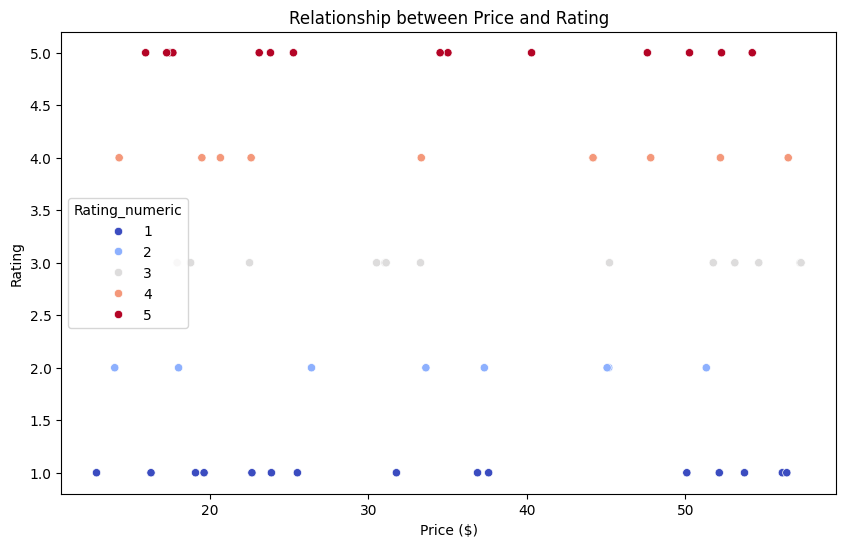

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating_numeric', data=df, hue='Rating_numeric', palette='coolwarm')
plt.title('Relationship between Price and Rating')
plt.xlabel('Price ($)')
plt.ylabel('Rating')
plt.show()

**f) Create a summary report with key findings.**

In [ ]:
summary_report = {
    'Total Books': len(df),
    'Average Price': df['Price'].mean(),
    'Average Rating': average_rating,
    'Books with 5 Star Rating': rating_counts.get(5, 0),
    'Books with 4 Star Rating': rating_counts.get(4, 0),
    'Books with 3 Star Rating': rating_counts.get(3, 0),
    'Books with 2 Star Rating': rating_counts.get(2, 0),
    'Books with 1 Star Rating': rating_counts.get(1, 0),
}

print("\nSummary Report:")
for key, value in summary_report.items():
    print(f"{key}: {value}")


Summary Report:
Total Books: 60
Average Price: 35.00266666666667
Average Rating: 3.0
Books with 5 Star Rating: 14
Books with 4 Star Rating: 10
Books with 3 Star Rating: 13
Books with 2 Star Rating: 8
Books with 1 Star Rating: 15


**Q7. (Computer vision) Create a visualization tool for ResNet feature maps to see how different
layers process images. You'll extract features from 3 key layers and display the first 16 channels
of each layer.**

**Requirements**

**a) Extract features from: First layer (conv1), Middle layer (layer2), Final layer (layer4)**

**b) Create visualizations: 4x4 grid layout, include colorbar, add titles, print statistics**

Statistics for First Layer:
Shape: torch.Size([16, 112, 112])
Mean: 0.0481
Std: 1.4905
Min: -21.9247
Max: 24.0242


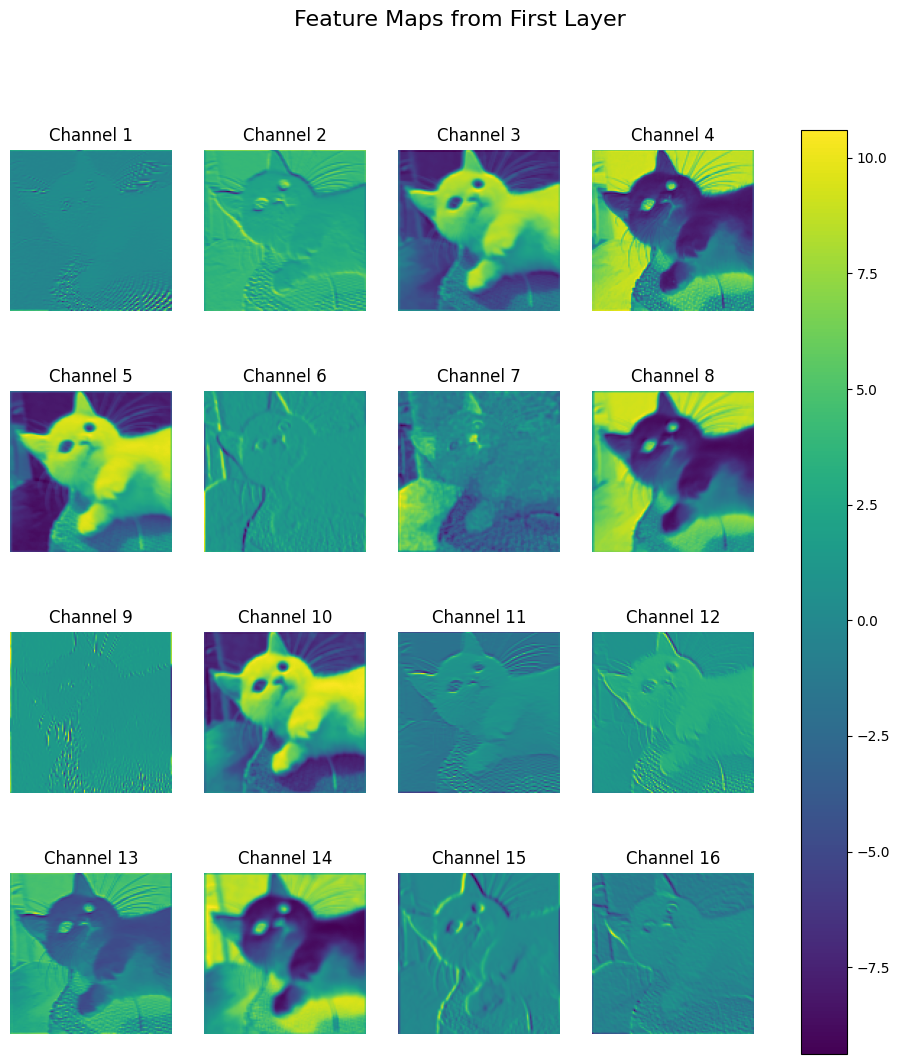

Statistics for Middle Layer:
Shape: torch.Size([16, 28, 28])
Mean: 0.1838
Std: 0.2882
Min: 0.0000
Max: 2.2408


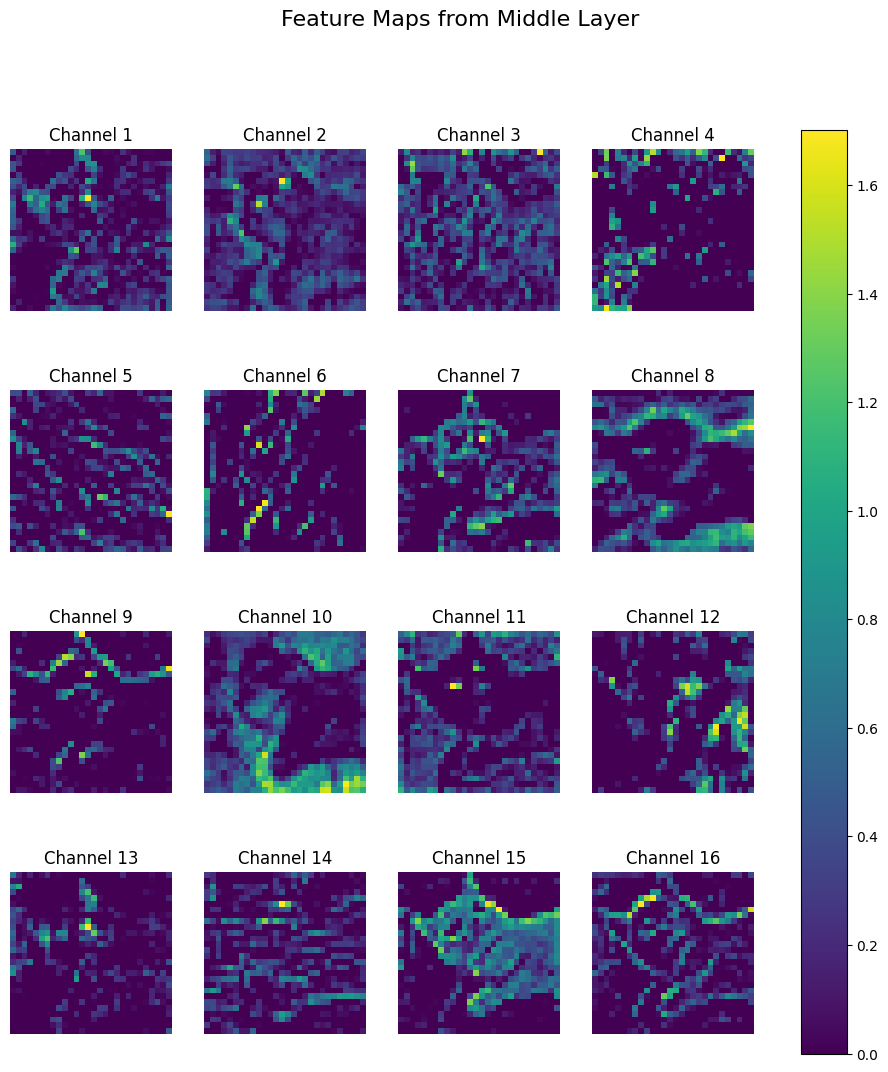

Statistics for Final Layer:
Shape: torch.Size([16, 7, 7])
Mean: 0.0687
Std: 0.1887
Min: 0.0000
Max: 2.2530


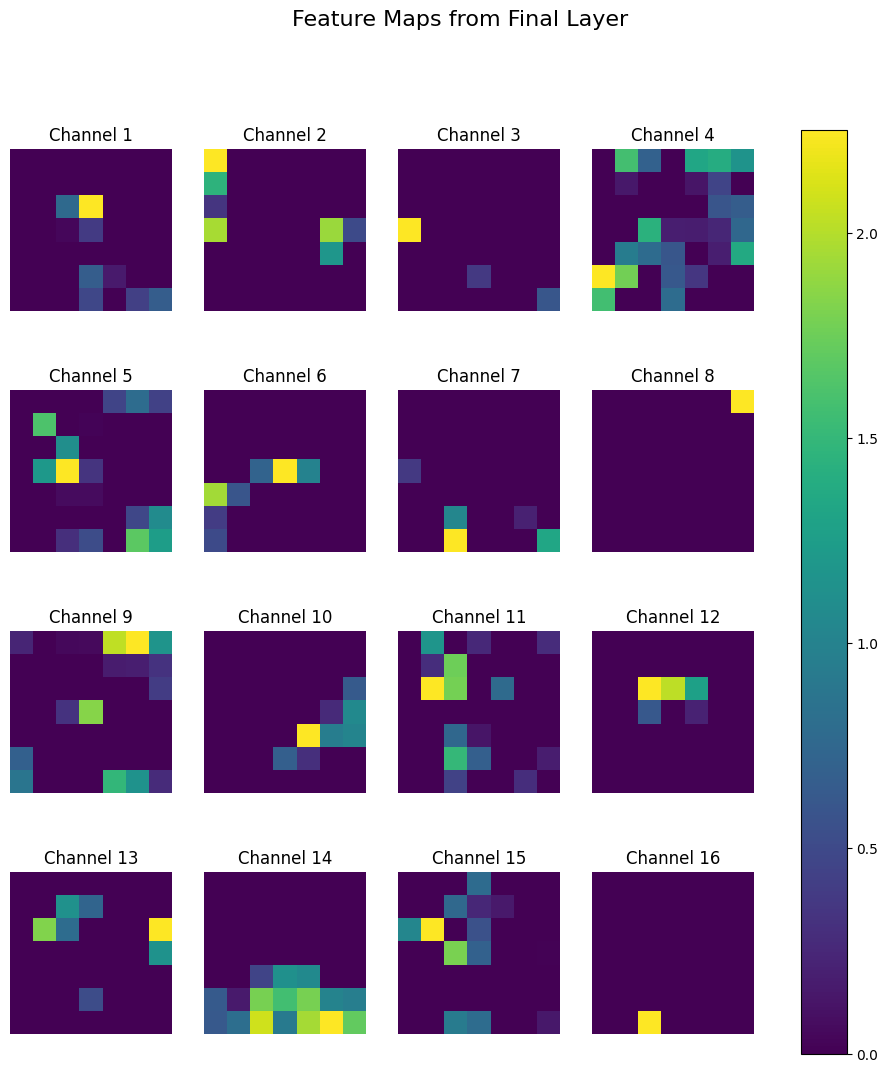

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

class FeatureVisualizer:
    def __init__(self):
        self.model = models.resnet18(pretrained=True)
        self.model.eval()
        self.features = {}

        self.model.conv1.register_forward_hook(self.get_features('conv1'))
        self.model.layer2[0].register_forward_hook(self.get_features('layer2'))
        self.model.layer4[0].register_forward_hook(self.get_features('layer4'))
        self.transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
        self.layer_names = {
            'conv1': 'First Layer',
            'layer2': 'Middle Layer',
            'layer4': 'Final Layer'
        }

    def get_features(self, layer_name):
        def hook(module, input, output):
            self.features[layer_name] = output.detach()
        return hook

    def load_image(self, url):
        try:
            response = requests.get(url)
            img = Image.open(BytesIO(response.content)).convert('RGB')
            img = self.transform(img).unsqueeze(0)
            return img
        except Exception as e:
            print(f"Error loading image: {str(e)}")
            return None

    def show_features(self, layer_name):
        if layer_name not in self.features:
            return

        feature_map = self.features[layer_name].squeeze(0)
        num_channels = feature_map.size(0)

        feature_map = feature_map[:16]
        fig, axes = plt.subplots(4, 4, figsize=(12, 12))
        axes = axes.flatten()

        for i in range(16):
            ax = axes[i]
            ax.imshow(feature_map[i].cpu().numpy(), cmap='viridis')
            ax.axis('off')
            ax.set_title(f"Channel {i+1}")

        plt.suptitle(f"Feature Maps from {self.layer_names[layer_name]}", fontsize=16)
        plt.colorbar(axes[0].imshow(feature_map[0].cpu().numpy(), cmap='viridis'), ax=axes.ravel().tolist())

        print(f"Statistics for {self.layer_names[layer_name]}:")
        print(f"Shape: {feature_map.shape}")
        print(f"Mean: {feature_map.mean().item():.4f}")
        print(f"Std: {feature_map.std().item():.4f}")
        print(f"Min: {feature_map.min().item():.4f}")
        print(f"Max: {feature_map.max().item():.4f}")

        plt.show()

    def process_image(self, url):
        img = self.load_image(url)
        if img is None:
            return

        with torch.no_grad():
            self.model(img)
        for layer_name in ['conv1', 'layer2', 'layer4']:
            self.show_features(layer_name)


def main():
    url = "https://pic3.zhimg.com/v2-dfaa1e8f5862e43205b8f25d3dc7b552_r.jpg?source=1940ef5c"
    visualizer = FeatureVisualizer()
    visualizer.process_image(url)

if __name__ == '__main__':
    main()
